# Analysis of Invite Views
## Kenneth Potts, 4/20/2017

## Split Test Analysis

We have the results from the roughly 3000 invites sent as follows:

 - Baseline: 32 quotes out of 595 viewers
 - Variation 1: 30 quotes out of 599 viewers
 - Variation 2: 18 quotes out of 622 viewers
 - Variation 3: 51 quotes out of 606 viewers
 - Variation 4: 38 quotes out of 578 viewers

In [1]:
import pandas as pd

In [4]:
data = pd.read_clipboard(delimiter='\t')

In [8]:
data = data.drop('Unnamed: 0', axis=1)

In [9]:
data

,Bucket,Quotes,Views
0,Baseline,32,595
1,Variation 1,30,599
2,Variation 2,18,622
3,Variation 3,51,606
4,Variation 4,38,578


In [10]:
index = data.iloc[:,0].values

In [11]:
data = data.drop('Bucket', axis=1).set_index(index)

### Interpretation

I am interpreting this in terms of quotes per view. Here we will calculate the metric.

In [12]:
data["quotes_per_view"] = data.iloc[:,0] / data.iloc[:,1]

In [13]:
data

,Quotes,Views,quotes_per_view
Baseline,32,595,0.053782
Variation 1,30,599,0.050083
Variation 2,18,622,0.028939
Variation 3,51,606,0.084158
Variation 4,38,578,0.065744


Even more than quotes per view, if we think of each view having a probability for each quote, conditioned on the Bucket which is being viewed, then the `quotes_per_view` is the average probability for each view having a quote. In this case we must determine whether the averages we see among the 5 buckets are due to chance alone given the total average, or if they are more extreme than we would expect due to chance. We can easily simulate this process.

In [14]:
import numpy as np

In [15]:
def simulate(p, n, t):
    """
    Simulate n view t times with a probability of quote of p.
    
    returns the number of quotes in t trials of p views (histogram)
    
    p is the probability of quote
    n is the number of views
    t is the number of trials
    """
    return (np.random.rand(n,t) < p).sum(axis=0) # generates the number of sumulated views

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use("seaborn-whitegrid")

If we assume that the values probability of a quote is the same for all Buckets, then then a good estimate of this probability is the average of all the `quotes_per_view`.

In [17]:
avg =  data.quotes_per_view.mean()
avg

0.056541250457961226

We can simulate using this value as our probability of a quote for a single view. We run this simulation 5 times (5 buckets) with $n$ views corresponding to the empirical views for each bucket.

We will use trial sizes of 2000.

In [18]:
sim_bucket_0 = simulate(p=avg, n=int(data.iloc[0,1]), t=2000)
sim_bucket_1 = simulate(p=avg, n=int(data.iloc[1,1]), t=2000)
sim_bucket_2 = simulate(p=avg, n=int(data.iloc[2,1]), t=2000)
sim_bucket_3 = simulate(p=avg, n=int(data.iloc[3,1]), t=2000)
sim_bucket_4 = simulate(p=avg, n=int(data.iloc[4,1]), t=2000)

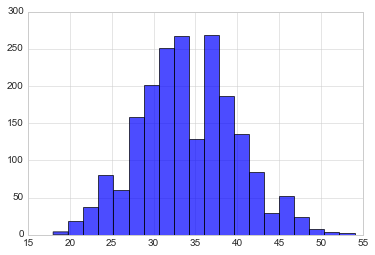

In [19]:
plt.hist(sim_bucket_0, bins=20, alpha=0.7);

We can consider a value significant if events as extreme or more extreme occur less than $5\%$ of the time

In [27]:
sim_0_low = np.percentile(sim_bucket_0,2.5)
sim_0_high = np.percentile(sim_bucket_0,97.5)

sim_1_low = np.percentile(sim_bucket_1,2.5)
sim_1_high = np.percentile(sim_bucket_1,97.5)

sim_2_low = np.percentile(sim_bucket_2,2.5)
sim_2_high = np.percentile(sim_bucket_2,97.5)

sim_3_low = np.percentile(sim_bucket_3,2.5)
sim_3_high = np.percentile(sim_bucket_3,97.5)

sim_4_low = np.percentile(sim_bucket_4,2.5)
sim_4_high = np.percentile(sim_bucket_4,97.5)


In [28]:
sim_0_low

23.0

In [29]:
sim_0_high

46.0

In [30]:
if data.iloc[0,0] > sim_0_high or data.iloc[0,0] < sim_0_low:
    print("significant resut for quotes for bucket {}".format(0))
else:
    print("Non-significant resut for quotes for bucket {}".format(0))
if data.iloc[1,0] > sim_1_high or data.iloc[1,0] < sim_1_low:
    print("significant resut for quotes for bucket {}".format(1))
else:
    print("Non-significant resut for quotes for bucket {}".format(1))
if data.iloc[2,0] > sim_2_high or data.iloc[2,0] < sim_2_low:
    print("significant resut for quotes for bucket {}".format(2))
else:
    print("Non-significant resut for quotes for bucket {}".format(2))
if data.iloc[3,0] > sim_3_high or data.iloc[3,0] < sim_3_low:
    print("significant resut for quotes for bucket {}".format(3))
else:
    print("Non-significant resut for quotes for bucket {}".format(3))
if data.iloc[4,0] > sim_4_high or data.iloc[4,0] < sim_4_low:
    print("significant resut for quotes for bucket {}".format(4))
else:
    print("Non-significant resut for quotes for bucket {}".format(4))

Non-significant resut for quotes for bucket 0
Non-significant resut for quotes for bucket 1
significant resut for quotes for bucket 2
significant resut for quotes for bucket 3
Non-significant resut for quotes for bucket 4


Two results appear to be statistically significant in this simulation, variation 2 and variation 3, where variation 2 had 18 quotes in 622 views, and variation 3 had 51 quotes in 606 views. The former being below the average, and latter being above the average. These variations have a significant impact on quotes per view, and likely have a different probabilities of a quote per view than the other variations.